# Treating outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
data = pd.read_csv('Car_sales.csv')
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

# OUTLIER TREATMENT

## BOX PLOT 

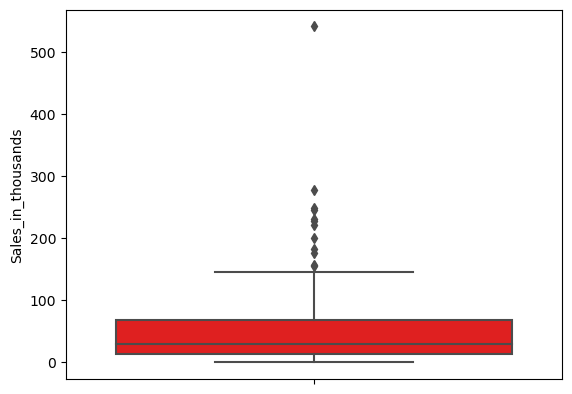

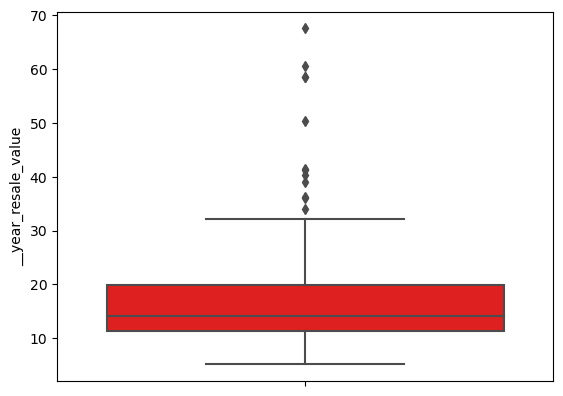

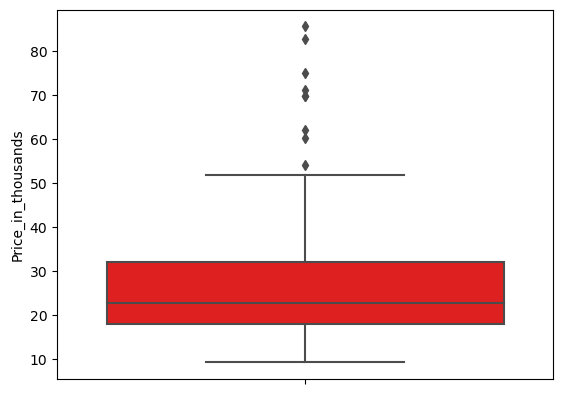

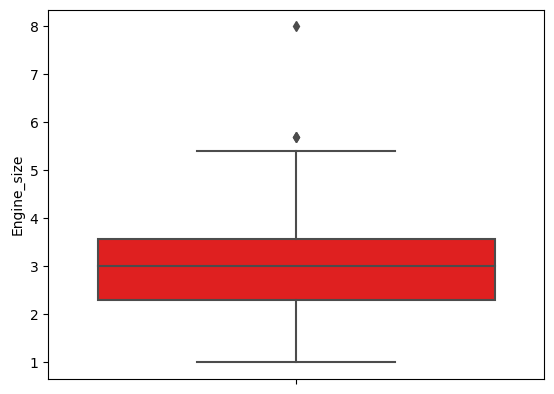

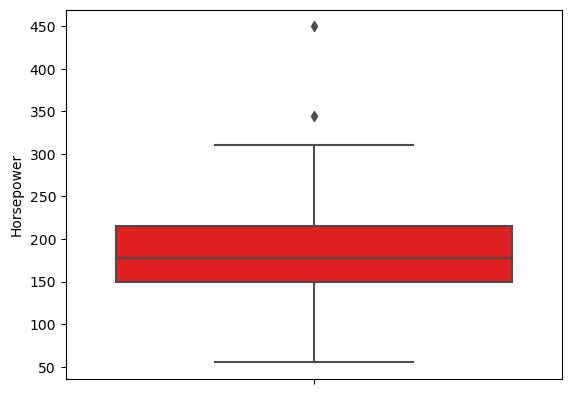

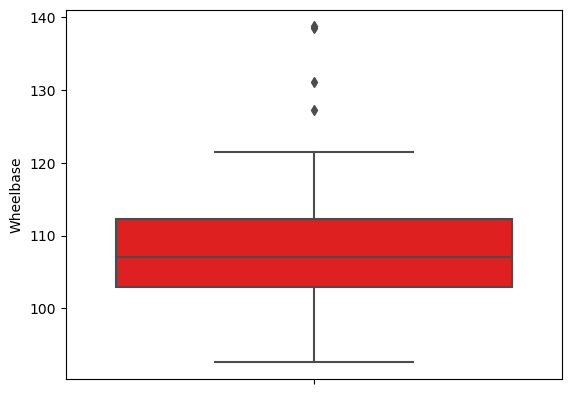

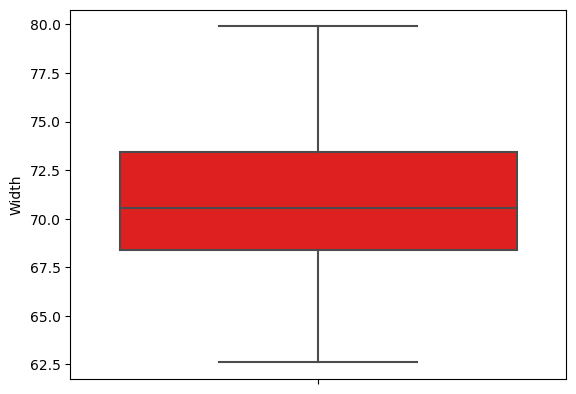

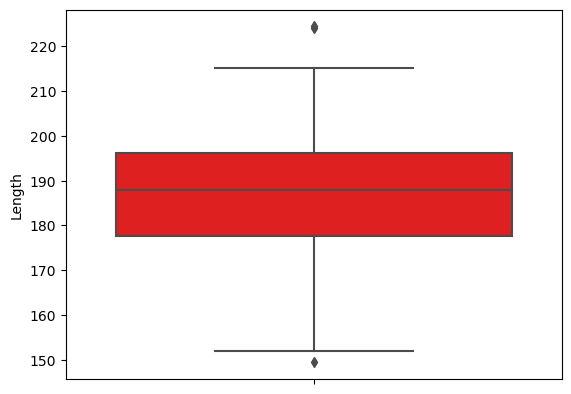

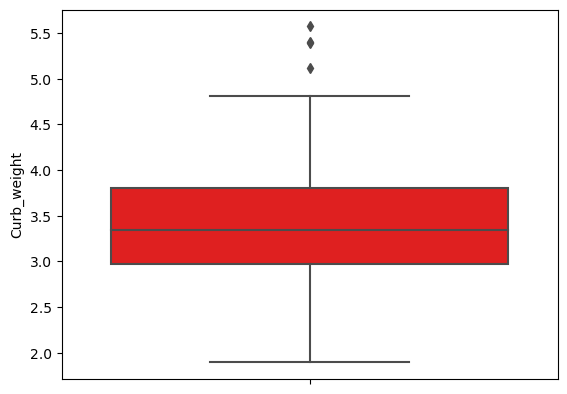

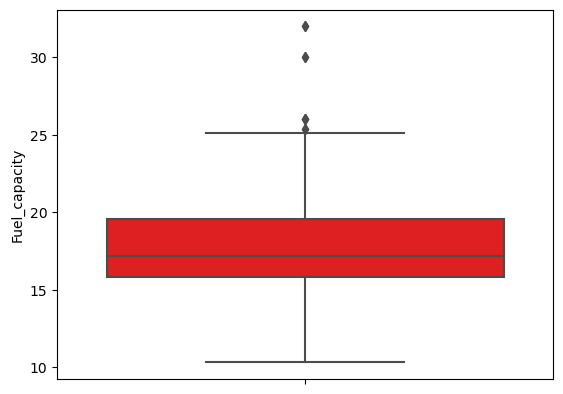

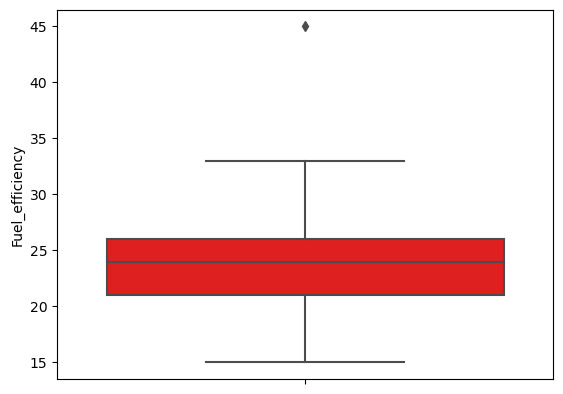

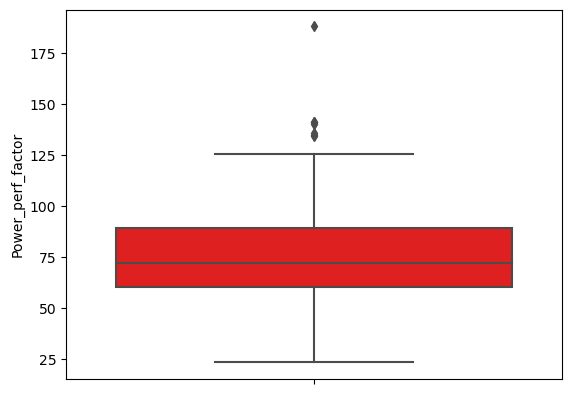

In [5]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i], color='red')
        plt.show();

# SETTING OUTLIER LIMITS:

In [6]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [7]:
for column in data.columns:
    if data[column].dtype !='object':
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

# LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

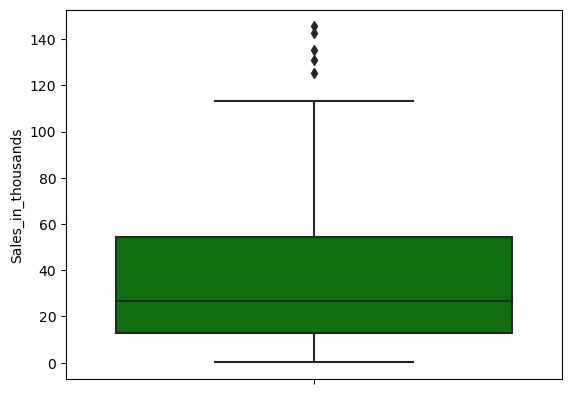

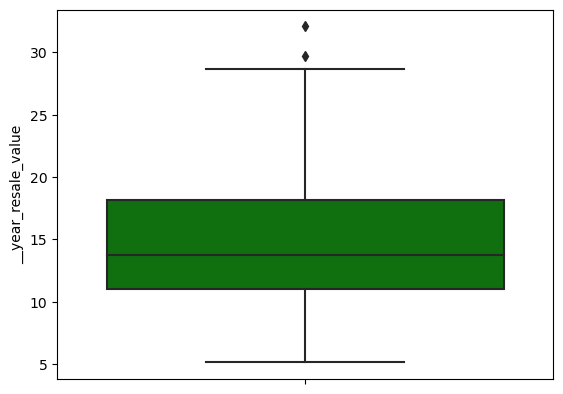

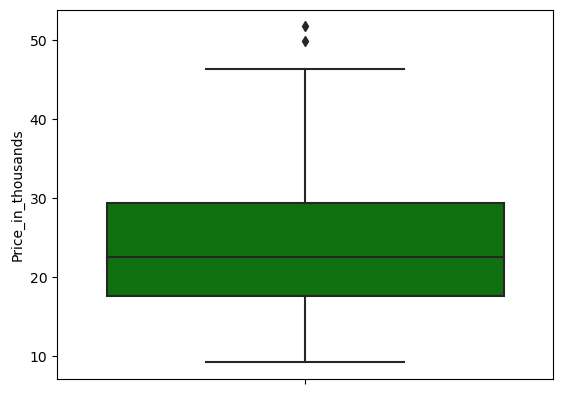

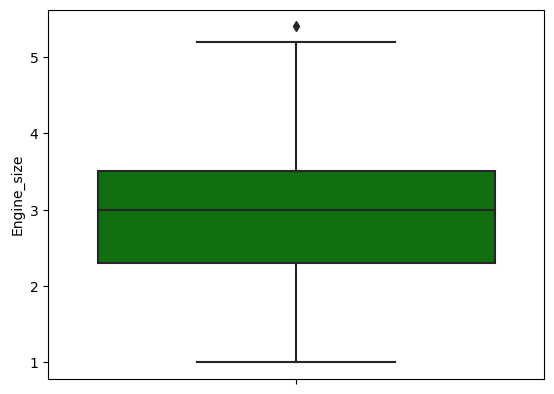

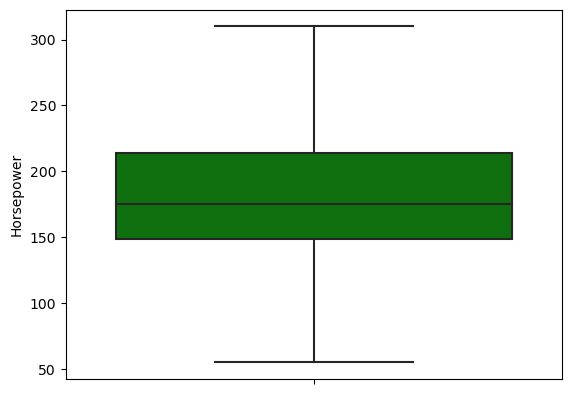

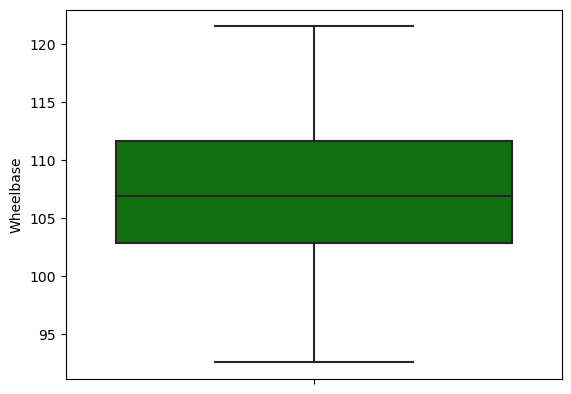

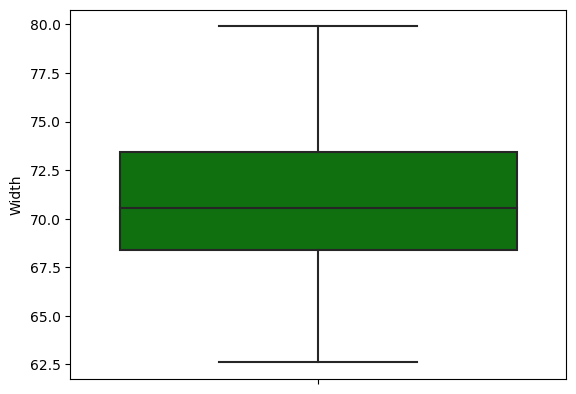

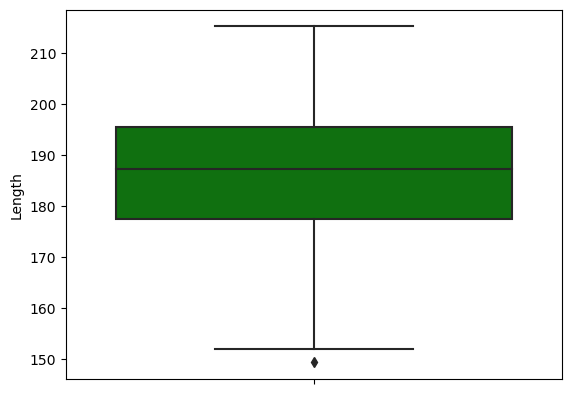

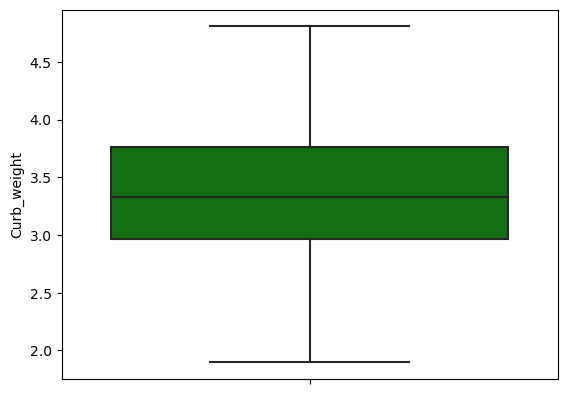

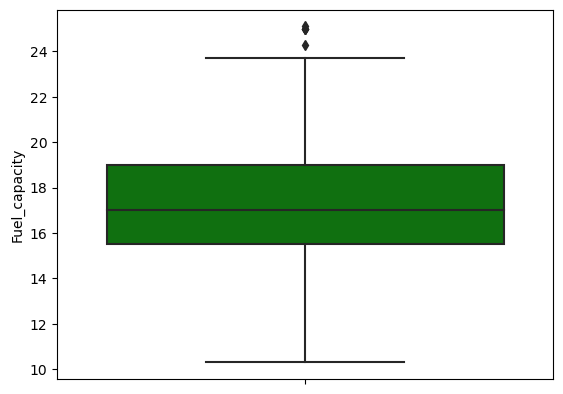

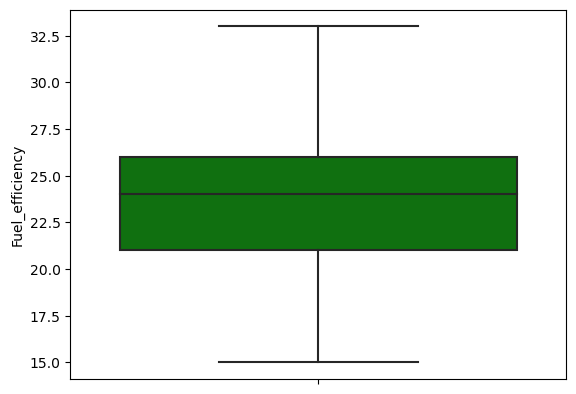

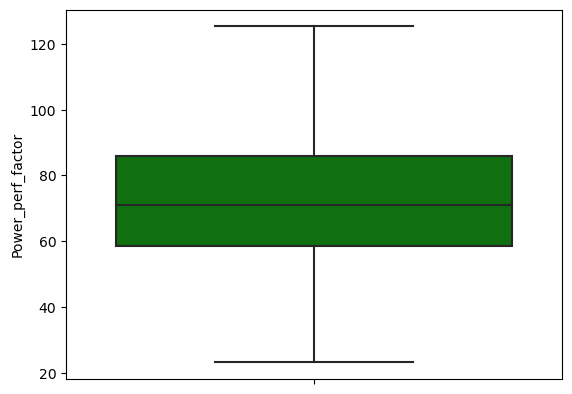

In [8]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i], color='green')
        plt.show();

## we can see that the outliers are treated